In [1]:
import tensorflow as tf; print('tensorflow version: ', tf.__version__)
import keras; print('keras version: ',keras.__version__)

tensorflow version:  2.2.0
keras version:  2.3.0-tf


Using TensorFlow backend.


In [48]:
import pandas as pd
import numpy as np
import IPython.display as ipd
import librosa

from sklearn import svm, datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

In [3]:
# parent folder of sound files
INPUT_DIR="../input/heartbeat-sounds/"

In [8]:
# #check input dir & naming conventions
# !pwd
# !ls -all ../input/heartbeat-sounds

In [9]:
# #for visuals of file naming conventions
# !ls -all ../input/heartbeat-sounds/set_b

# Basic Data Scoping
Gaining a sense of basic properties such as size, distribution, etc.

In [10]:
set_a=pd.read_csv(INPUT_DIR+"set_a.csv")
set_a.head()

,dataset,fname,label,sublabel
0,a,set_a/artifact__201012172012.wav,artifact,NaN
1,a,set_a/artifact__201105040918.wav,artifact,NaN
2,a,set_a/artifact__201105041959.wav,artifact,NaN
3,a,set_a/artifact__201105051017.wav,artifact,NaN
4,a,set_a/artifact__201105060108.wav,artifact,NaN


In [11]:
set_a.label.describe()

count          124
unique           4
top       artifact
freq            40
Name: label, dtype: object

In [12]:
set_b=pd.read_csv(INPUT_DIR+"set_b.csv")
set_b.head()

,dataset,fname,label,sublabel
0,b,set_b/Btraining_extrastole_127_1306764300147_C...,extrastole,NaN
1,b,set_b/Btraining_extrastole_128_1306344005749_A...,extrastole,NaN
2,b,set_b/Btraining_extrastole_130_1306347376079_D...,extrastole,NaN
3,b,set_b/Btraining_extrastole_134_1306428161797_C...,extrastole,NaN
4,b,set_b/Btraining_extrastole_138_1306762146980_B...,extrastole,NaN


In [13]:
set_b.label.describe()

count        461
unique         3
top       normal
freq         320
Name: label, dtype: object

In [14]:
frames = [set_a, set_b]
train_set=pd.concat(frames)
train_set.describe()

,dataset,fname,label,sublabel
count,832,832,585,149
unique,2,832,5,2
top,b,set_b/Bunlabelledtest_155_1306935902813_B2.wav,normal,noisynormal
freq,656,1,351,120


In [15]:
classes=train_set.label.unique()

print("Number of training examples: ", train_set.shape[0])
print("Number of classes: ", len(classes))
print (classes)

Number of training examples:  832
Number of classes:  6
['artifact' 'extrahls' 'murmur' 'normal' nan 'extrastole']


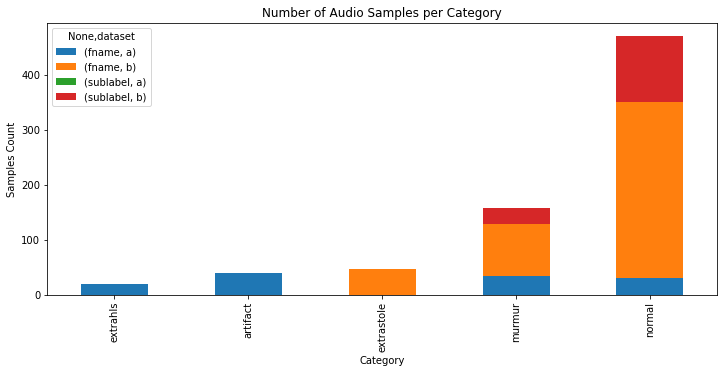

In [16]:
#data distribution
category_group = train_set.groupby(['label','dataset']).count()
plot = category_group.unstack().reindex(category_group.unstack().sum(axis=1).sort_values().index)\
          .plot(kind='bar', stacked=True, title="Number of Audio Samples per Category", figsize=(12,5))
plot.set_xlabel("Category")
plot.set_ylabel("Samples Count");

### Toggle function for easier experimentation

In [17]:
def leadingTag(tags, noisy, toggle, sets):
    s = tags[toggle] + "_"
    if noisy:
        s = s + "noisy" + tags[toggle]
    s += "_"
    if sets == "a":
        s = "set_a/" + s
    elif sets == "b":
        s = "set_b/" + s
    return s

# Normal Pulse Recordings

In [18]:
noisy = False
tags = ["normal", "murmur", "extrastole", "extrahls", "artifact"]
toggle = 0
sets = 'b'
print(leadingTag(tags, noisy, toggle, sets))

set_b/normal__


In [19]:
#filter for normal sounds in set b
df_b_normal = set_b[set_b.label == "normal"]
df_b_normal.head()

,dataset,fname,label,sublabel
112,b,set_b/Btraining_normal_103_1305031931979_B.wav,normal,NaN
113,b,set_b/Btraining_normal_103_1305031931979_D1.wav,normal,NaN
114,b,set_b/Btraining_normal_103_1305031931979_D2.wav,normal,NaN
115,b,set_b/Btraining_normal_103_1305031931979_D3.wav,normal,NaN
116,b,set_b/Btraining_normal_106_1306776721273_B1.wav,normal,NaN


In [20]:
#filter for clean sounds in set b normal
df_b_normal_clean = df_b_normal[df_b_normal.sublabel != "noisynormal"]
df_b_normal_clean.head()

,dataset,fname,label,sublabel
112,b,set_b/Btraining_normal_103_1305031931979_B.wav,normal,NaN
113,b,set_b/Btraining_normal_103_1305031931979_D1.wav,normal,NaN
114,b,set_b/Btraining_normal_103_1305031931979_D2.wav,normal,NaN
115,b,set_b/Btraining_normal_103_1305031931979_D3.wav,normal,NaN
116,b,set_b/Btraining_normal_106_1306776721273_B1.wav,normal,NaN


### Checking Out Sound

In [21]:
n=1 #select one file to listen
files = np.random.choice(df_b_normal_clean.fname, n)
print(files[0])
s=files[0]
#e.g. set_b/Btraining_normal_179_1307990076841_D.wav

start = s.find("normal_")+len("normal_")
filename = leadingTag(tags, noisy, toggle, sets) + s[start:]
normal_file=INPUT_DIR+filename
print(normal_file)
print(s)

set_b/Btraining_normal_113_1306244002866_D.wav
../input/heartbeat-sounds/set_b/normal__113_1306244002866_D.wav
set_b/Btraining_normal_113_1306244002866_D.wav


In [22]:
# normal_file = INPUT_DIR+"set_a/murmur__201108222231.wav"

##### Reading Audio

In [23]:
import librosa
y, sr = librosa.load(normal_file)
print(y.shape)
print(sr)

(82942,)
22050


##### Visualizing Audio

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

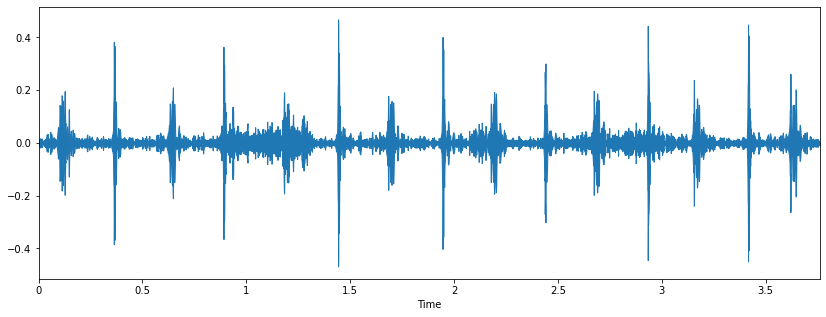

In [25]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(y, sr=sr)

##### Hearing Audio

In [26]:
ipd.Audio(normal_file)

# Basic Signal Processing

### Detecting Onsets
from https://librosa.org/librosa/master/generated/librosa.onset.onset_detect.html

In [27]:
t_seconds = librosa.get_duration(y, sr)
print(y[:50])
print(sr)
print(t_seconds)

[-0.00417525 -0.00537878 -0.00649643 -0.00742042 -0.00806289 -0.00837016
 -0.00833157 -0.00798106 -0.00739136 -0.00666153 -0.00590033 -0.00520836
 -0.00466242 -0.00430459 -0.00413826 -0.00413131 -0.00422582 -0.00435218
 -0.00444488 -0.00445685 -0.00436984 -0.0041988  -0.0039896  -0.00381056
 -0.00373932 -0.00384748 -0.00418565 -0.00477173 -0.0055845  -0.00656375
 -0.00761721 -0.00863339 -0.00949838 -0.01011399 -0.01041428 -0.01037775
 -0.01003273 -0.00945498 -0.0087573  -0.00807247 -0.00753221 -0.00724533
 -0.0072789  -0.00764583 -0.00830123 -0.00914886 -0.01005651 -0.01087849
 -0.01148103 -0.01176613]
22050
3.761541950113379


In [28]:
onset_frames = librosa.onset.onset_detect(y, sr=sr)
librosa.frames_to_time(onset_frames, sr=sr)

array([0.13931973, 0.27863946, 0.37151927, 0.67337868, 0.90557823,
       1.46285714, 1.71827664, 1.97369615, 2.13623583, 2.34521542,
       2.46131519, 2.57741497, 2.69351474, 2.94893424, 3.18113379,
       3.43655329, 3.64553288])

In [29]:
onset_env = librosa.onset.onset_strength(y, sr=sr)
times = librosa.frames_to_time(np.arange(len(onset_env)), sr=sr)
onset_frames = librosa.onset.onset_detect(onset_envelope=onset_env, sr=sr)

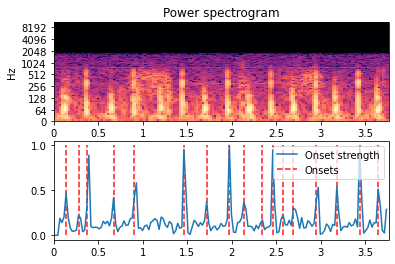

In [30]:
D = np.abs(librosa.stft(y))
plt.figure()
ax1 = plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), x_axis='time', y_axis='log')
plt.title('Power spectrogram')
plt.subplot(2, 1, 2, sharex=ax1)
plt.plot(times, onset_env, label='Onset strength')
plt.vlines(times[onset_frames], 0, onset_env.max(), color='r', alpha=0.9, linestyle='--', label='Onsets')
plt.axis('tight')
plt.legend(frameon=True, framealpha=0.75)
plt.show()

Note that we can see fairly distinguished peaks for both S1 and S2 above, yet the onsets are messy and no consistent trends are visualizable since the recording is not perfectly clean.

In [31]:
# tempo, beats = librosa.beat.beat_track(y, sr=sr)
tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env, sr=sr)
# print(beats)
print("Heart Rate: ", int(tempo), "BPM")

Heart Rate:  123 BPM


### Visualizing "Dub"s

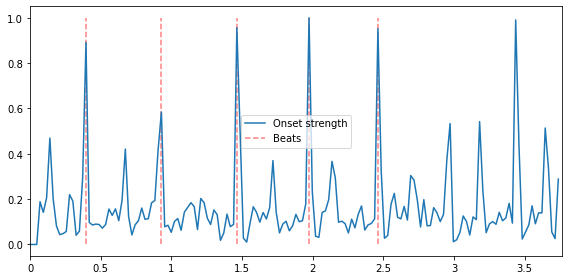

In [32]:
hop_length = 512
plt.figure(figsize=(8, 4))
times = librosa.times_like(onset_env, sr=sr, hop_length=hop_length)
plt.plot(times, librosa.util.normalize(onset_env), label='Onset strength')
plt.vlines(times[beats], 0, 1, alpha=0.5, color='r', linestyle='--', label='Beats')
plt.legend(frameon=True, framealpha=0.75)

# Limit the plot to length of clip
plt.xlim(0, t_seconds)
plt.gca().xaxis.set_major_formatter(librosa.display.TimeFormatter())
plt.tight_layout()
plt.show()

Here we made use of the tempo feature to clearly identify heart rate by pinpointing S2s. This enables us to correctly account for softer sounds such as the two found between 0s and 1s. (using ../input/heartbeat-sounds/set_b/normal__170_1307970562729_B.wav)

### Tempogram

In [ ]:
# y, sr = librosa.load(normal_file)
hop_length = 512
oenv = librosa.onset.onset_strength(y=y, sr=sr, hop_length=hop_length)
tempogram = librosa.feature.tempogram(onset_envelope=oenv, sr=sr, hop_length=hop_length)
ac_global = librosa.util.normalize(librosa.autocorrelate(oenv, max_size=tempogram.shape[0]))

plt.figure(figsize=(8, 8))
plt.subplot(4, 1, 1)
plt.plot(oenv, label='Onset strength')
plt.xticks([])
plt.legend(frameon=True)
plt.axis('tight')
plt.subplot(4, 1, 2)

# We'll truncate the display to a narrower range of tempi
librosa.display.specshow(tempogram, sr=sr, hop_length=hop_length, x_axis='time', y_axis='tempo')
plt.axhline(tempo, color='w', linestyle='--', alpha=1, label='Estimated tempo={:g}'.format(tempo))
plt.legend(frameon=True, framealpha=0.75)
plt.subplot(4, 1, 3)
x = np.linspace(0, tempogram.shape[0] * float(hop_length) / sr, num=tempogram.shape[0])
plt.plot(x, np.mean(tempogram, axis=1), label='Mean local autocorrelation')
plt.plot(x, ac_global, '--', alpha=0.75, label='Global autocorrelation')
plt.xlabel('Lag (seconds)')
plt.axis('tight')
plt.legend(frameon=True)
plt.subplot(4,1,4)

# We can also plot on a BPM axis
freqs = librosa.tempo_frequencies(tempogram.shape[0], hop_length=hop_length, sr=sr)
plt.semilogx(freqs[1:], np.mean(tempogram[1:], axis=1), label='Mean local autocorrelation', basex=2)
plt.semilogx(freqs[1:], ac_global[1:], '--', alpha=0.75, label='Global autocorrelation', basex=2)
plt.axvline(tempo, color='black', linestyle='--', alpha=.8, label='Estimated tempo={:g}'.format(tempo))
plt.legend(frameon=True)
plt.xlabel('BPM')
plt.axis('tight')
plt.grid()
plt.tight_layout()
plt.show()

### Spectral Features

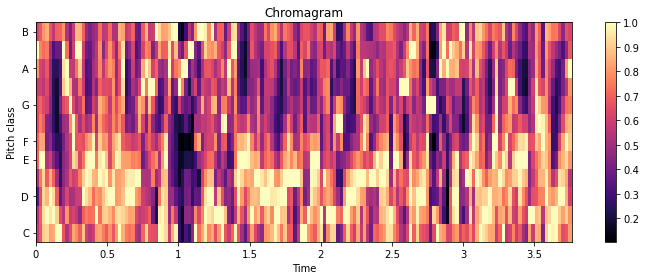

In [35]:
chroma = librosa.feature.chroma_stft(y=y, sr=sr)
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()
plt.show()

In [36]:
print("Size: ", chroma.size)
print("Shape: ", chroma.shape)
print(chroma)

Size:  1944
Shape:  (12, 162)
[[0.58391875 0.6767319  0.90531784 ... 0.6527506  0.6809977  0.81818527]
 [0.5327524  0.70183766 0.9370531  ... 0.8222028  0.9131638  0.7906591 ]
 [0.33910552 0.64952695 0.922064   ... 1.         0.85191834 0.60479915]
 ...
 [0.8136488  0.61864865 0.5888762  ... 0.4126017  0.80182385 1.        ]
 [1.         0.77343136 0.7240554  ... 0.3260666  0.47420007 0.683331  ]
 [0.6188344  0.68747485 0.8039385  ... 0.461676   0.6624842  0.62745416]]


# Feature Extraction

### Basic Feature Extraction: Sample Rate, Duration, Tempo

In [37]:
def df_report(df):
    col_labels = list(df.columns.values) 
    l_dataset = df.dataset.unique()
    l_label = df.label.unique()
#     l_sublabel = df.sublabel.unique()

    print(df.info(), '\n')
    print("dataset.unique: ", l_dataset)
    print("label.unique: ", l_label)
#     print("sublabel.unique: ", l_sublabel)
    
    return col_labels

In [38]:
train_set.head()

,dataset,fname,label,sublabel
0,a,set_a/artifact__201012172012.wav,artifact,NaN
1,a,set_a/artifact__201105040918.wav,artifact,NaN
2,a,set_a/artifact__201105041959.wav,artifact,NaN
3,a,set_a/artifact__201105051017.wav,artifact,NaN
4,a,set_a/artifact__201105060108.wav,artifact,NaN


In [39]:
print(train_set.info(), '\n')
print("dataset.unique: ", train_set.dataset.unique())
print("label.unique: ", train_set.label.unique())
print("sublabel.unique: ", train_set.sublabel.unique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 832 entries, 0 to 655
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   dataset   832 non-null    object
 1   fname     832 non-null    object
 2   label     585 non-null    object
 3   sublabel  149 non-null    object
dtypes: object(4)
memory usage: 32.5+ KB
None 

dataset.unique:  ['a' 'b']
label.unique:  ['artifact' 'extrahls' 'murmur' 'normal' nan 'extrastole']
sublabel.unique:  [nan 'noisymurmur' 'noisynormal']


In [40]:
df=train_set
#using labelled data only
df=df[df['label'].notnull()]

df_report(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 585 entries, 0 to 655
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   dataset   585 non-null    object
 1   fname     585 non-null    object
 2   label     585 non-null    object
 3   sublabel  149 non-null    object
dtypes: object(4)
memory usage: 22.9+ KB
None 

dataset.unique:  ['a' 'b']
label.unique:  ['artifact' 'extrahls' 'murmur' 'normal' 'extrastole']


['dataset', 'fname', 'label', 'sublabel']

In [41]:
#replacing NaN with empty strings
df['sublabel'] = df['sublabel'].replace(np.nan, "")
df_report(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 585 entries, 0 to 655
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   dataset   585 non-null    object
 1   fname     585 non-null    object
 2   label     585 non-null    object
 3   sublabel  585 non-null    object
dtypes: object(4)
memory usage: 22.9+ KB
None 

dataset.unique:  ['a' 'b']
label.unique:  ['artifact' 'extrahls' 'murmur' 'normal' 'extrastole']


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


['dataset', 'fname', 'label', 'sublabel']

In [42]:
def findPath(dataset, label, noisy):
    s = label + "_"
    if noisy != "":
#         print(noisy)
        s += noisy
    s+= "_"
    if dataset == "a":
        s = "set_a/" + s
    else:
        s = "set_b/" + s
    return s

In [43]:
#setting fname to correct file path
import re
df["path"] = ""
for index, row in df.iterrows():
    m = re.search(r"\d", row["fname"])
    idtag = row["fname"][m.start():]
#     print(idtag)
    if row["sublabel"] == np.nan:
        row["sublabel"] = ""
    row["path"] = INPUT_DIR + findPath(row["dataset"], row["label"], row["sublabel"]) + idtag

df.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,dataset,fname,label,sublabel,path
0,a,set_a/artifact__201012172012.wav,artifact,,../input/heartbeat-sounds/set_a/artifact__2010...
1,a,set_a/artifact__201105040918.wav,artifact,,../input/heartbeat-sounds/set_a/artifact__2011...
2,a,set_a/artifact__201105041959.wav,artifact,,../input/heartbeat-sounds/set_a/artifact__2011...
3,a,set_a/artifact__201105051017.wav,artifact,,../input/heartbeat-sounds/set_a/artifact__2011...
4,a,set_a/artifact__201105060108.wav,artifact,,../input/heartbeat-sounds/set_a/artifact__2011...


In [44]:
# df=df.drop(columns=['fname', 'sublabel'])
df.head()

,dataset,fname,label,sublabel,path
0,a,set_a/artifact__201012172012.wav,artifact,,../input/heartbeat-sounds/set_a/artifact__2010...
1,a,set_a/artifact__201105040918.wav,artifact,,../input/heartbeat-sounds/set_a/artifact__2011...
2,a,set_a/artifact__201105041959.wav,artifact,,../input/heartbeat-sounds/set_a/artifact__2011...
3,a,set_a/artifact__201105051017.wav,artifact,,../input/heartbeat-sounds/set_a/artifact__2011...
4,a,set_a/artifact__201105060108.wav,artifact,,../input/heartbeat-sounds/set_a/artifact__2011...


In [45]:
# df["y"] = ""
df["sr"] = ""
df["t_seconds"] = ""
df["tempo"] = ""
# df["beats"] = ""
for index, row in df.iterrows():
    y, row["sr"] = librosa.load(row["path"])
    row["t_seconds"] = librosa.get_duration(y, sr)
    onset_env = librosa.onset.onset_strength(y, sr=sr)
    row["tempo"], beats = librosa.beat.beat_track(onset_envelope=onset_env, sr=sr)
df.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,dataset,fname,label,sublabel,path,sr,t_seconds,tempo
0,a,set_a/artifact__201012172012.wav,artifact,,../input/heartbeat-sounds/set_a/artifact__2010...,22050,9,129.199
1,a,set_a/artifact__201105040918.wav,artifact,,../input/heartbeat-sounds/set_a/artifact__2011...,22050,9,107.666
2,a,set_a/artifact__201105041959.wav,artifact,,../input/heartbeat-sounds/set_a/artifact__2011...,22050,9,112.347
3,a,set_a/artifact__201105051017.wav,artifact,,../input/heartbeat-sounds/set_a/artifact__2011...,22050,9,135.999
4,a,set_a/artifact__201105060108.wav,artifact,,../input/heartbeat-sounds/set_a/artifact__2011...,22050,9,123.047


In [46]:
# df=df.drop(columns=['y', 'beats'])
df_report(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 585 entries, 0 to 655
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   dataset    585 non-null    object
 1   fname      585 non-null    object
 2   label      585 non-null    object
 3   sublabel   585 non-null    object
 4   path       585 non-null    object
 5   sr         585 non-null    object
 6   t_seconds  585 non-null    object
 7   tempo      585 non-null    object
dtypes: object(8)
memory usage: 41.1+ KB
None 

dataset.unique:  ['a' 'b']
label.unique:  ['artifact' 'extrahls' 'murmur' 'normal' 'extrastole']


['dataset', 'fname', 'label', 'sublabel', 'path', 'sr', 't_seconds', 'tempo']

In [47]:
# df.to_csv('ts_A.csv')

###### Extremely inefficient implementation of dataframe iteration but was temporarily unable to find a better method and thus deemed it acceptable for prototyping purposes.

### Advanced Feature Extraction

# Classification

In [64]:
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [49]:
X = pd.read_csv("/kaggle/input/heartpulsea/ts_A.csv")
X.head()

,Unnamed: 0,dataset,label,path,sr,t_seconds,tempo
0,0,a,artifact,../input/heartbeat-sounds/set_a/artifact__2010...,22050,9.0,129.199219
1,1,a,artifact,../input/heartbeat-sounds/set_a/artifact__2011...,22050,9.0,107.666016
2,2,a,artifact,../input/heartbeat-sounds/set_a/artifact__2011...,22050,9.0,112.347147
3,3,a,artifact,../input/heartbeat-sounds/set_a/artifact__2011...,22050,9.0,135.999178
4,4,a,artifact,../input/heartbeat-sounds/set_a/artifact__2011...,22050,9.0,123.046875


In [50]:
y=X['label']
#retaining only numerical values
X=X.drop(columns=['label', 'path', 'Unnamed: 0', 'dataset'])

In [51]:
col_labels = y.unique()
print(col_labels)

['artifact' 'extrahls' 'murmur' 'normal' 'extrastole']


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=60)

In [ ]:
# clf = svm.SVC(kernel='linear')
# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10, 5), random_state=1)
clf.fit(X, y)
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=col_labels,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()